<center>
<h1>Leaf Clustering using Unsupervised Learning</h1>
</center>

# Classification de Feuilles à partir de Descripteurs (Margin, Shape, Texture)
## Méthodes : K-Means, CAH, Elbow, Silhouette, ACP


## 1. Extraction des noms des différentes classes et vérification du nombre total de classes

Dans cette étape, nous allons extraire les noms des différentes classes de feuilles à partir de la colonne "species" du fichier `leaf_train.csv`. Ensuite, nous vérifierons si le nombre total de classes est bien de 99, comme annoncé, ou s'il y en a plus ou moins.

- Nous allons utiliser la fonction `unique()` de pandas pour obtenir toutes les classes uniques dans la colonne "species".
- Ensuite, nous afficherons le nombre total de classes.

In [44]:
# Importation de pandas
import pandas as pd

# Chargement du fichier train
train_data = pd.read_csv("leaf_train.csv")

# Extraction des espèces (classes)
especes_uniques = train_data["species"].unique()

# Affichage des noms des espèces
print("Liste des espèces présentes :")
print(especes_uniques)

# Calcul et affichage du nombre total de classes
nombre_especes = len(especes_uniques)
print("\nNombre total de classes :", nombre_especes)


Liste des espèces présentes :
['Acer_Opalus' 'Pterocarya_Stenoptera' 'Quercus_Hartwissiana'
 'Tilia_Tomentosa' 'Quercus_Variabilis' 'Magnolia_Salicifolia'
 'Quercus_Canariensis' 'Quercus_Rubra' 'Quercus_Brantii' 'Salix_Fragilis'
 'Zelkova_Serrata' 'Betula_Austrosinensis' 'Quercus_Pontica'
 'Quercus_Afares' 'Quercus_Coccifera' 'Fagus_Sylvatica' 'Phildelphus'
 'Acer_Palmatum' 'Quercus_Pubescens' 'Populus_Adenopoda' 'Quercus_Trojana'
 'Alnus_Sieboldiana' 'Quercus_Ilex' 'Arundinaria_Simonii'
 'Acer_Platanoids' 'Quercus_Phillyraeoides' 'Cornus_Chinensis'
 'Liriodendron_Tulipifera' 'Cytisus_Battandieri'
 'Rhododendron_x_Russellianum' 'Alnus_Rubra' 'Eucalyptus_Glaucescens'
 'Cercis_Siliquastrum' 'Cotinus_Coggygria' 'Celtis_Koraiensis'
 'Quercus_Crassifolia' 'Quercus_Kewensis' 'Cornus_Controversa'
 'Quercus_Pyrenaica' 'Callicarpa_Bodinieri' 'Quercus_Alnifolia'
 'Acer_Saccharinum' 'Prunus_X_Shmittii' 'Prunus_Avium' 'Quercus_Greggii'
 'Quercus_Suber' 'Quercus_Dolicholepis' 'Ilex_Cornuta' 'Tilia_

Interprétation :
Ce résultat confirme que le jeu de données d'entraînement contient exactement 99 classes distinctes.

## 2.  Classification non supervisée avec KMeans (choix optimal de K)

Nous allons ignorer les étiquettes en supprimant la colonne species, puis appliquer un algorithme de clustering KMeans sur les descripteurs pré-extraits.
Pour fixer le nombre de clusters, nous utiliserons :

.L'indice de Silhouette

.La méthode de l'Elbow

.(Nous intégrons aussi un aperçu de la CAH via un dendrogramme pour visualiser la structure)


Prétraitement des données

In [45]:
# On supprime les colonnes 'id' et 'species' afin de travailler sur les caractéristiques seules.
X_features = train_data.drop(columns=["id", "species"])

# Normalisation des données
from sklearn.preprocessing import StandardScaler

scaling_model = StandardScaler()
X_norm = scaling_model.fit_transform(X_features)


Choix de K par l'indice de Silhouette

K = 2: Silhouette Score = 0.1349
K = 3: Silhouette Score = 0.1276
K = 4: Silhouette Score = 0.1064
K = 5: Silhouette Score = 0.0970
K = 6: Silhouette Score = 0.0998
K = 7: Silhouette Score = 0.0895
K = 8: Silhouette Score = 0.0995
K = 9: Silhouette Score = 0.1015
K = 10: Silhouette Score = 0.1049
K = 11: Silhouette Score = 0.1107
K = 12: Silhouette Score = 0.1166
K = 13: Silhouette Score = 0.1138
K = 14: Silhouette Score = 0.1109
K = 15: Silhouette Score = 0.1074
K = 16: Silhouette Score = 0.1172
K = 17: Silhouette Score = 0.1136
K = 18: Silhouette Score = 0.1189
K = 19: Silhouette Score = 0.1217
K = 20: Silhouette Score = 0.1208
K = 21: Silhouette Score = 0.1219
K = 22: Silhouette Score = 0.1289
K = 23: Silhouette Score = 0.1222
K = 24: Silhouette Score = 0.1337
K = 25: Silhouette Score = 0.1345
K = 26: Silhouette Score = 0.1295
K = 27: Silhouette Score = 0.1346
K = 28: Silhouette Score = 0.1365
K = 29: Silhouette Score = 0.1407
K = 30: Silhouette Score = 0.1436
K = 31: Silhouette Sco

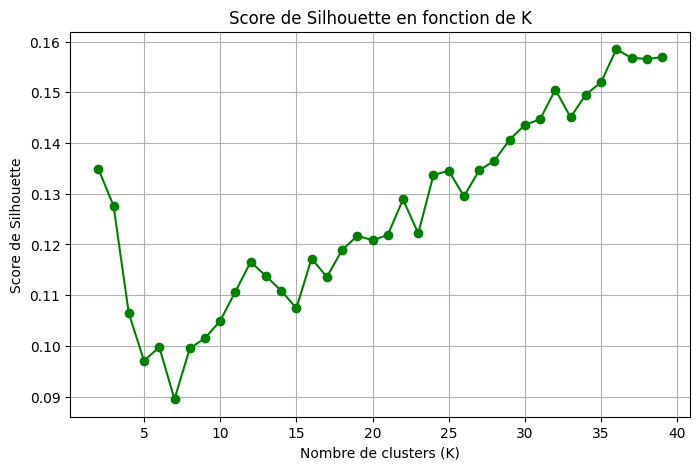

Meilleur K (Silhouette) : 36


In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# On teste différentes valeurs de K (de 2 à 39)
silhouette_vals = []
k_options = range(2, 40)

for k in k_options:
    k_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_ids = k_model.fit_predict(X_norm)
    s_score = silhouette_score(X_norm, cluster_ids)
    silhouette_vals.append(s_score)
    print(f"K = {k}: Silhouette Score = {s_score:.4f}")

# Visualisation du score de silhouette
plt.figure(figsize=(8, 5))
plt.plot(k_options, silhouette_vals, marker='o', color='green')
plt.title("Score de Silhouette en fonction de K")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Score de Silhouette")
plt.grid(True)
plt.show()

# Choix du meilleur K selon Silhouette
optimal_k_sil = k_options[np.argmax(silhouette_vals)]
print(f"Meilleur K (Silhouette) : {optimal_k_sil}")


Résultats obtenus :

- On a testé une plage de valeurs de K allant de 2 à 39.

- Le score de silhouette est relativement faible pour de petits K (par exemple, environ 0.1349 pour K=2).

- Le score augmente progressivement, atteignant un maximum pour K=36 avec un score de silhouette de 0.1585 (le maximum relevé dans les résultats).

Ainsi, selon l’indice de silhouette, le meilleur K est 36.

Choix de K par la méthode de l'Elbow

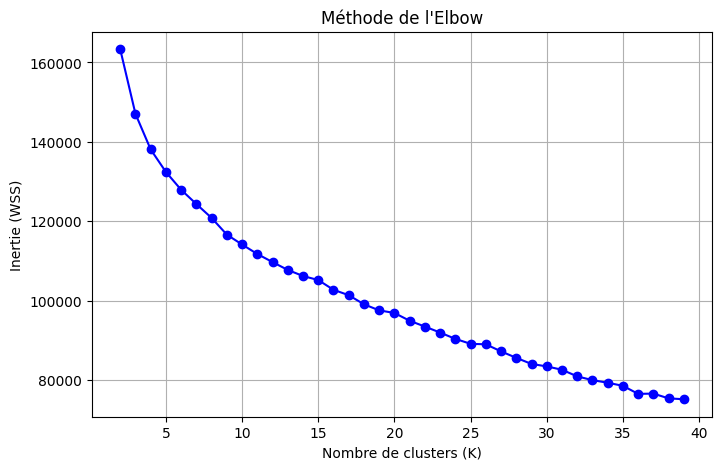

In [47]:
# Calcul de l'inertie (Within-Cluster Sum of Squares) pour différentes valeurs de K
inertie_vals = []

for k in k_options:
    k_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    k_model.fit(X_norm)
    inertie_vals.append(k_model.inertia_)

# Visualisation de la courbe de l'Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_options, inertie_vals, marker='o', color='blue')
plt.title("Méthode de l'Elbow")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie (WSS)")
plt.grid(True)
plt.show()


Interprétation
On observe que l’inertie diminue rapidement pour de petites valeurs de K (entre 2 et 5), puis la courbe s’aplatit progressivement.

On cherche un “coude” (un point de rupture) sur la courbe, c’est-à-dire l’endroit où la diminution de l’inertie ralentit sensiblement.

Sur la figure, il n’y a pas un coude très marqué à un endroit précis, mais on peut noter un changement de pente autour de 𝐾≈10.

Entre K=2 et K=8, l’inertie baisse très vite.

Au-delà de K=10, la baisse continue mais de manière plus graduelle.

Choix de K (Elbow)
Sur ce graphe, un choix raisonnable pourrait être K=10.

Aperçu de la structure par CAH (dendrogramme)

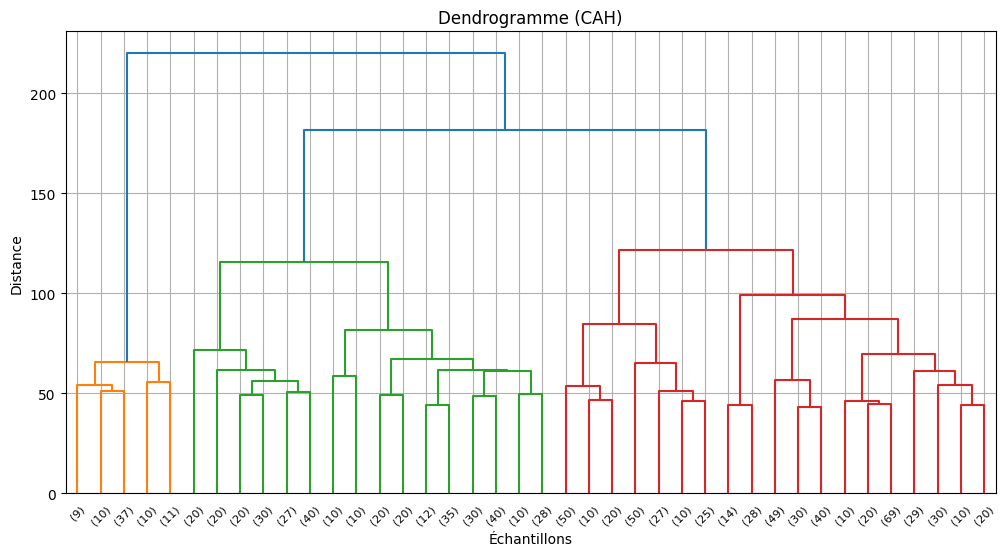

In [48]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calcul du linkage avec la méthode Ward
link_matrix = linkage(X_norm, method='ward')

# Tracé du dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(link_matrix, truncate_mode="lastp", p=40)
plt.title("Dendrogramme (CAH)")
plt.xlabel("Échantillons")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

# Remarque : Le dendrogramme vous aide à visualiser la structure des clusters.
# Vous pouvez choisir un K cohérent avec l'indice de silhouette.


Interprétation
Pour “couper” le dendrogramme, on choisit un seuil de distance. Tous les groupes qui fusionnent au-dessus de ce seuil seront considérés comme des clusters distincts.

On remarque trois grandes branches qui se séparent vers la zone supérieure (l’échelle de distance est d’environ 200).

Si on trace une ligne horizontale à une distance d’environ ~120, on obtient probablement 3 ou 4 gros groupes.

En descendant un peu plus bas (distance ~70 ou 80), on peut aller jusqu’à 5 ou 6 groupes.

Choix de K (CAH):
- Si on veut peu de clusters (plus agrégés), on coupe haut (ex. ~120) et on obtient 3 grands clusters.

- Si on préfère plus de granularité, on coupe plus bas (ex. ~80 ou 90) et on peut obtenir 4 ou 5 clusters.

Ainsi, en se basant sur ce dendrogramme on pourrait choisir K=5.

Application finale de KMeans avec le K choisi :par exemple le K obtenu via la méthode de la silhouette, c'est-à-dire optimal_k_sil.

In [49]:
# Choix du nombre de clusters optimal (par exemple, celui de la silhouette)
optimal_k = optimal_k_sil

# Entraînement final du modèle KMeans
final_kmeans = KMeans(n_clusters=optimal_k, random_state=100, n_init=10)
final_cluster_ids = final_kmeans.fit_predict(X_norm)

print("Étiquettes de cluster obtenues par KMeans :")
print(final_cluster_ids)


Étiquettes de cluster obtenues par KMeans :
[ 2 13 12  2 27 16 12 30  0 25  0  1 14  2 35 27 23  7 32 26 27 27 17 26
 34 35 23 19 23 27 16 26  2 31 33  5 27 19 12  4 27 12  9 35 19  8 21 23
  0 18 33 22 14 23  3  2 35 27 23 12  4 31 16 13  2 20 12 27  7 27 16 29
 24  4  6 24  0  2 12 17  3 21 22 28  1 16 26 12  5  1 20  1  3  1 18 16
 12  5  5  1 27  0 10 13  3 20 27  8 34 13 34 12 23  7  3 14  2  2 16  4
  9 19 33 29 19  8 12  0 16 16  1 35 15 10  3 16 27  3 13 23 14  5 12 16
 18 16  4 27 27  2  6  9  5 26  1 23  9 19 12 27  8  3 16  1  9  5 33  9
 26  8  5 32 33  8  9  9  5 28 33  4  2  3 23 35  8  7 16 16 27 16  6  9
 35  8 17 27  2 16 15  3  1 26 20 23 16  9  0  6  6 30 17 29 19 28 16  1
 18 33 26  4 17 17 11 17  6  8 21  4 30 13  3 35 30 33  3  5 17 29  3 27
  1 35 13 16 16 34 27 15 10  6 13 26 30 34 22  4 27 16 16 13 14  9 25 27
 20 35  1 27 20  6 28 19 14  0 34 26 22 16  2  8 15 27 19 34 10 19  6 20
  3 33  3 11 23 10  2  1  9 20  3  0 33  0  1  9 12  9 16 23 13 18 23 20
 35 19 

## 3.Évaluation sur le fichier Test

In [50]:
# Chargement du fichier test
test_data = pd.read_csv("leaf_test.csv")

# Suppression de la colonne 'id' 
X_test = test_data.drop(columns=["id"])

# Normalisation en utilisant le même scaler que pour l'entraînement
X_test_norm = scaling_model.transform(X_test)

# Prédiction des clusters sur les données test
test_cluster_ids = final_kmeans.predict(X_test_norm)

# Calcul du score de silhouette sur les données test
test_silhouette = silhouette_score(X_test_norm, test_cluster_ids)
print(f"Score de Silhouette (Test) : {test_silhouette:.4f}")


Score de Silhouette (Test) : 0.1411


Le score de silhouette calculé sur le jeu test fournit une mesure interne de la qualité du clustering. Une valeur de 0.1411 suggère que les clusters obtenus sur les données test sont relativement peu séparés, ce qui est typique pour des données complexes ou très hétérogènes.

Évaluation quantitative (ARI sur Train)

In [51]:
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

# On suppose que 'df' correspond au fichier d'entraînement déjà chargé
# et que 'labels_final' contient les étiquettes obtenues par KMeans.
# Pour cette partie, nous allons encoder les vraies étiquettes numériques.

encoder = LabelEncoder()
y_true = encoder.fit_transform(df["species"])

# Calcul de l'Adjusted Rand Index
ari_value = adjusted_rand_score(y_true, final_cluster_ids)
print(f"Adjusted Rand Index (Train): {ari_value:.4f}")


Adjusted Rand Index (Train): 0.3440


Interprétation :
Un ARI proche de 1 indiquerait une très bonne correspondance entre les clusters et les vraies étiquettes, alors qu’une valeur proche de 0 ou négative indique peu ou pas de correspondance. Dans notre cas, cela vous donne une mesure quantitative de la qualité du regroupement.
Avec 0.344, on peut dire que le clustering n’est pas aléatoire, mais il n’est pas encore très proche des vraies classes non plus. Cela peut s’expliquer par :

- un recouvrement entre les groupes de feuilles selon leurs descripteurs ;

- ou que les descripteurs ne sont pas totalement discriminants entre les espèces.




Évaluation qualitative (Visualisation des images par Cluster)


Affichage pour le Cluster 0 :


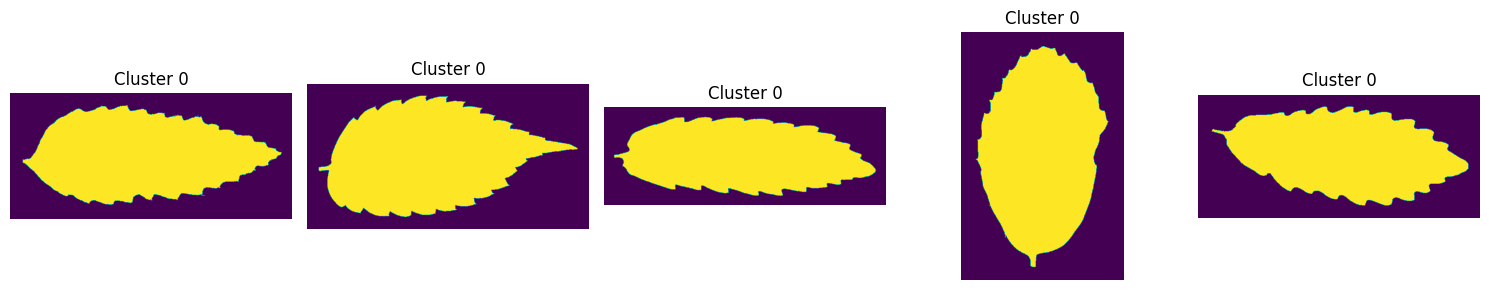


Affichage pour le Cluster 1 :


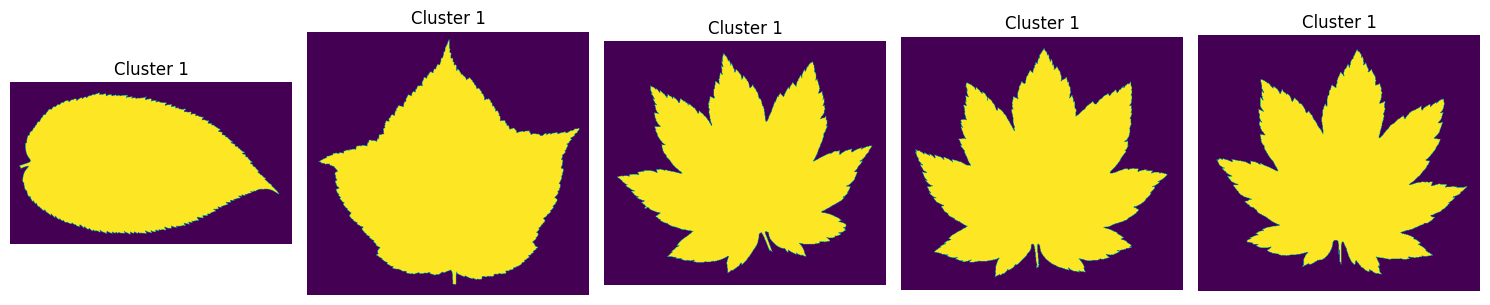


Affichage pour le Cluster 2 :


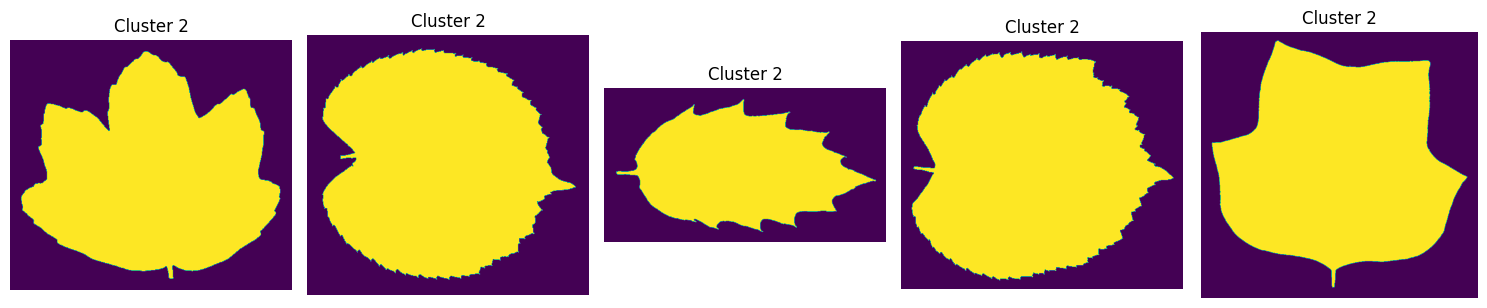


Affichage pour le Cluster 3 :


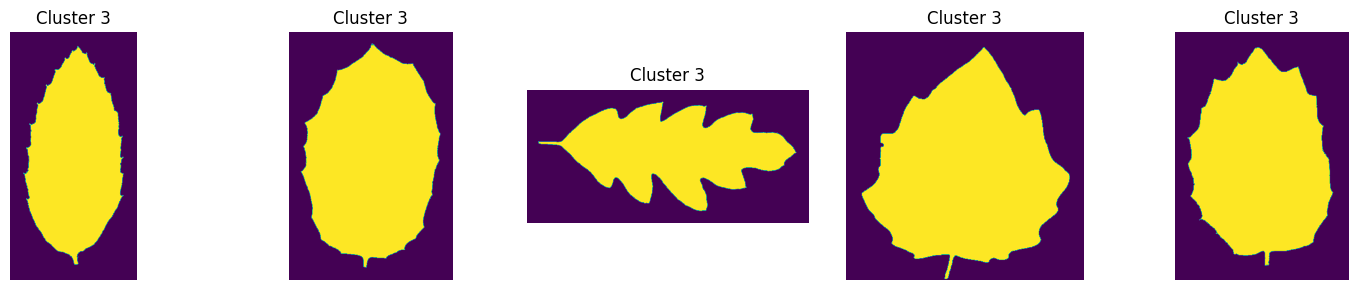


Affichage pour le Cluster 4 :


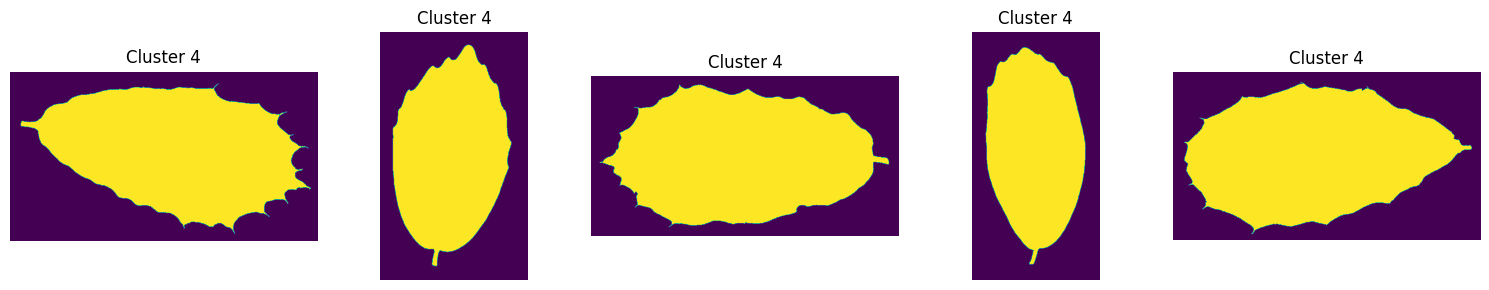


Affichage pour le Cluster 5 :


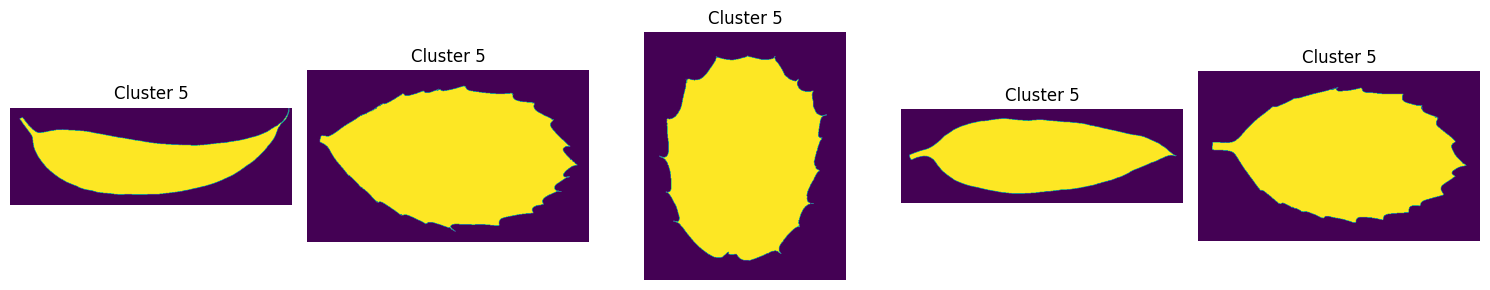


Affichage pour le Cluster 6 :


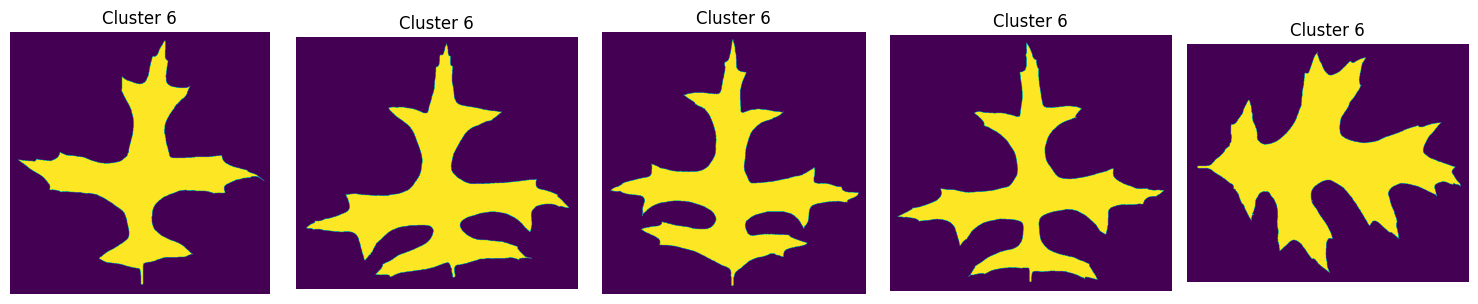


Affichage pour le Cluster 7 :


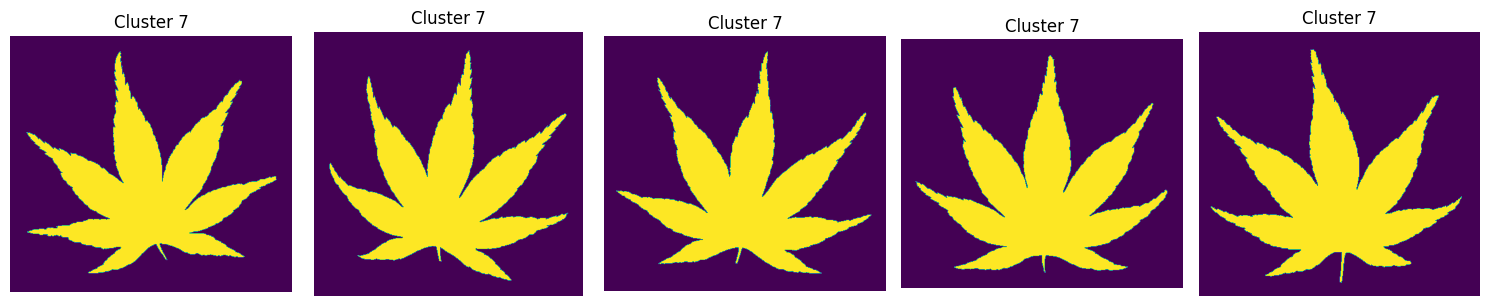


Affichage pour le Cluster 8 :


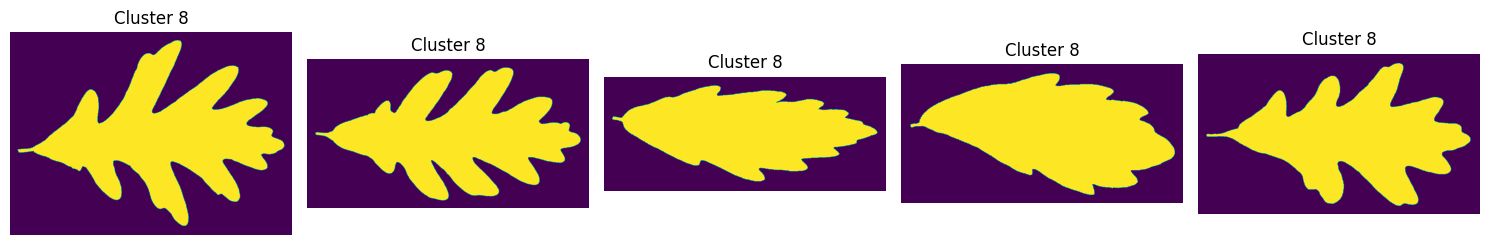


Affichage pour le Cluster 9 :


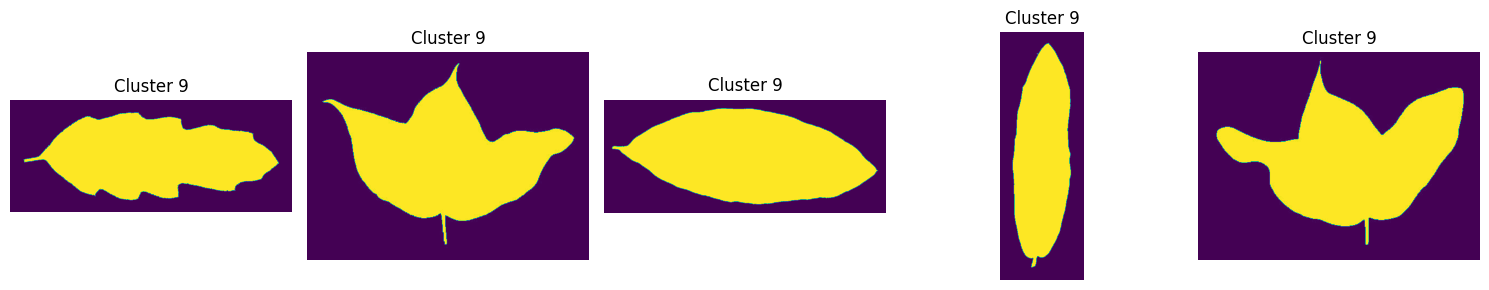


Affichage pour le Cluster 10 :


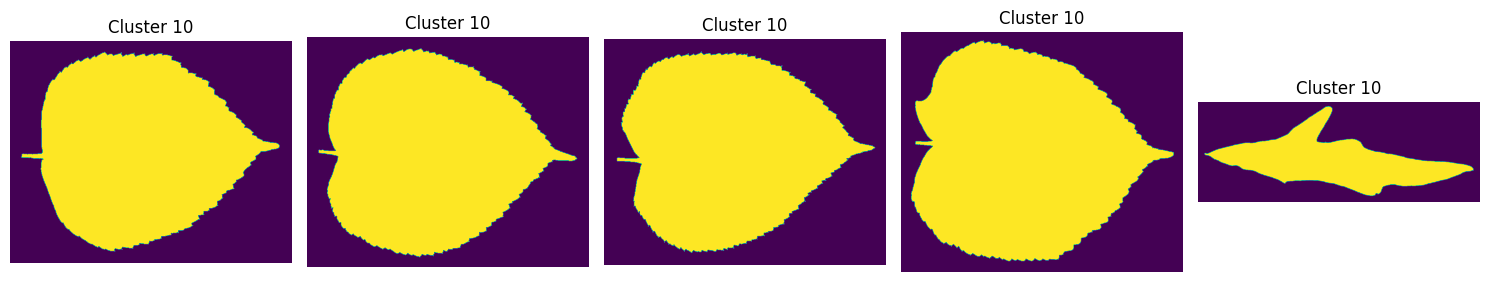


Affichage pour le Cluster 11 :


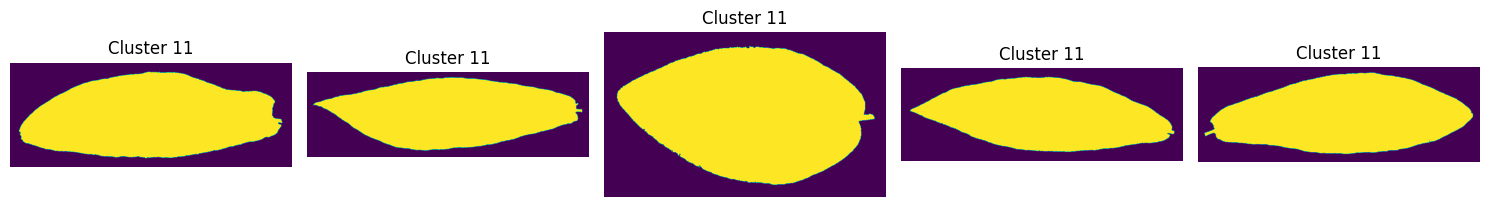


Affichage pour le Cluster 12 :


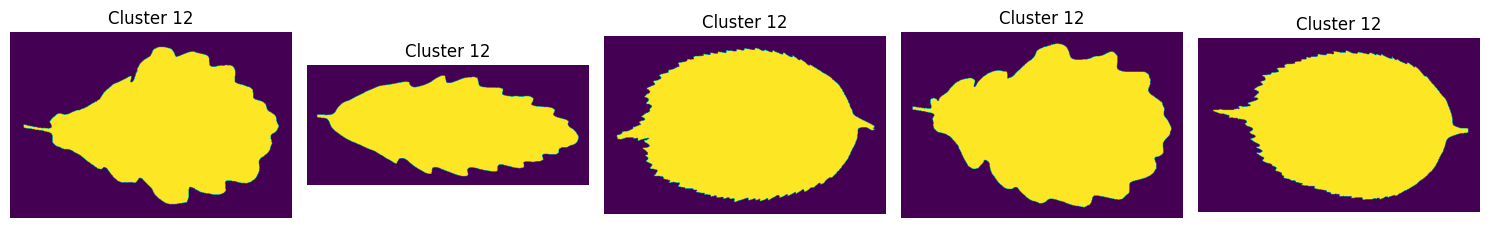


Affichage pour le Cluster 13 :


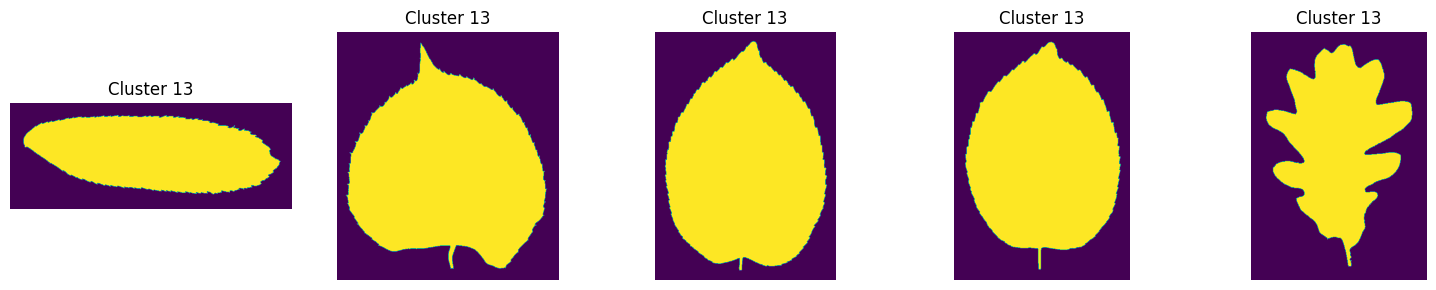


Affichage pour le Cluster 14 :


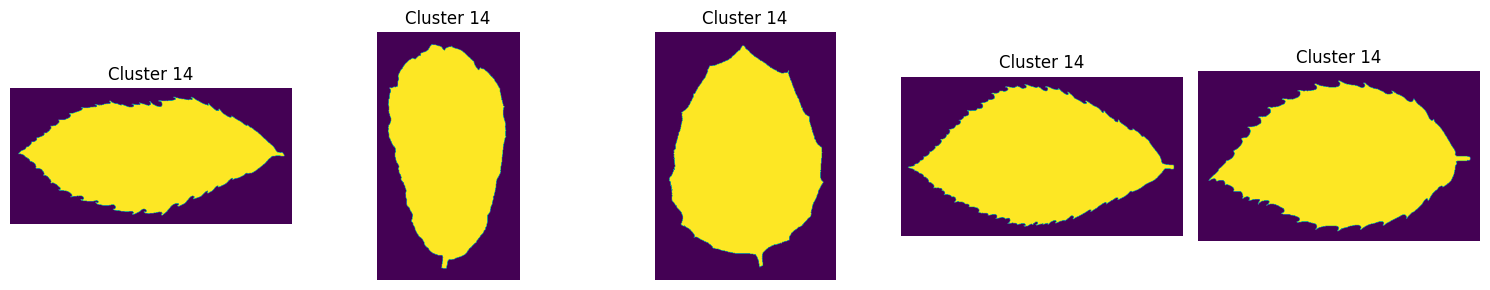


Affichage pour le Cluster 15 :


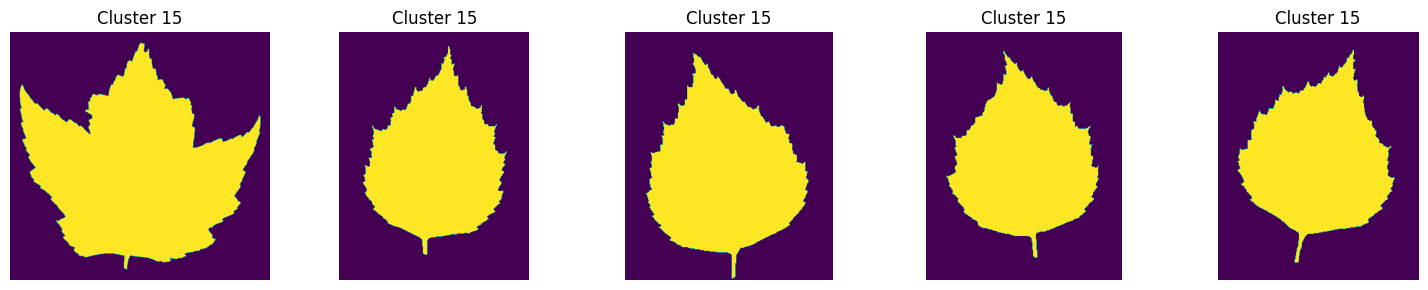


Affichage pour le Cluster 16 :


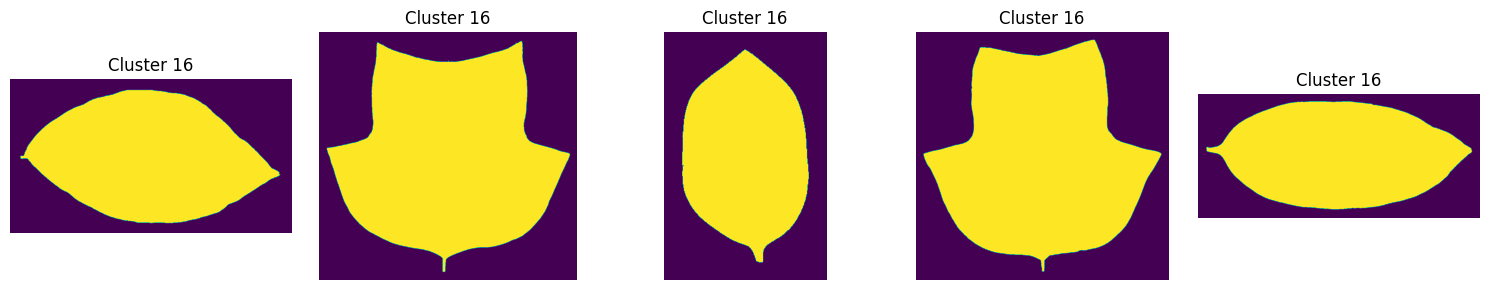


Affichage pour le Cluster 17 :


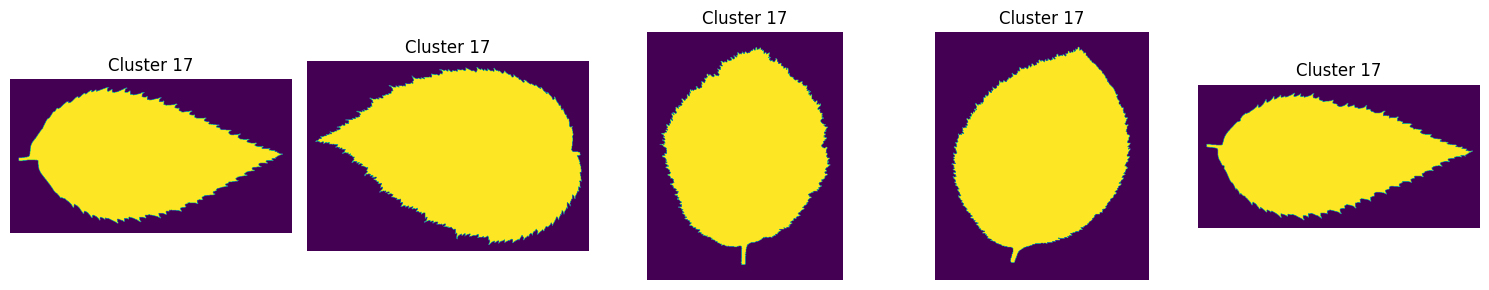


Affichage pour le Cluster 18 :


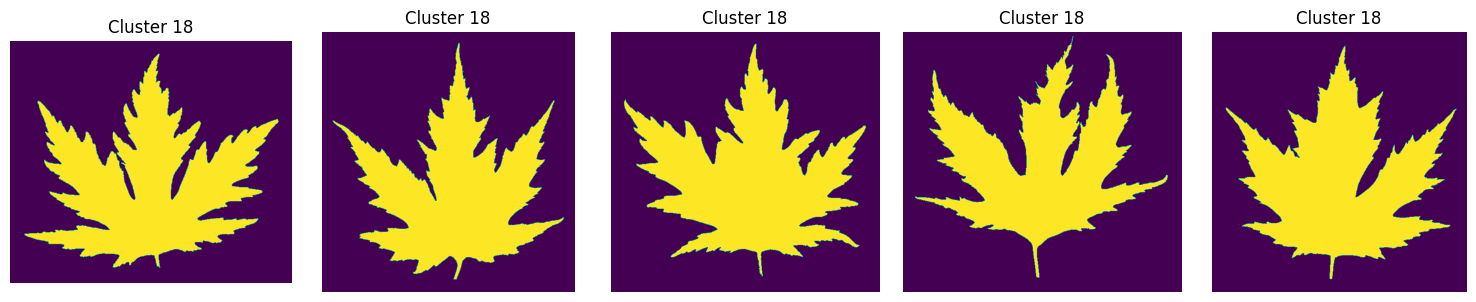


Affichage pour le Cluster 19 :


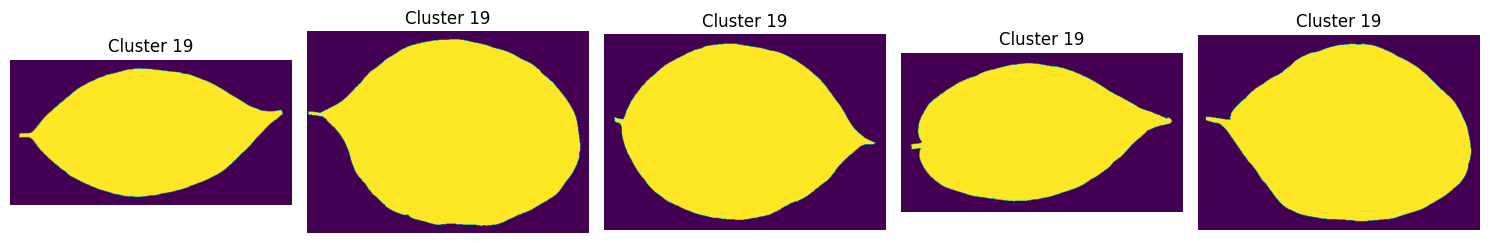


Affichage pour le Cluster 20 :


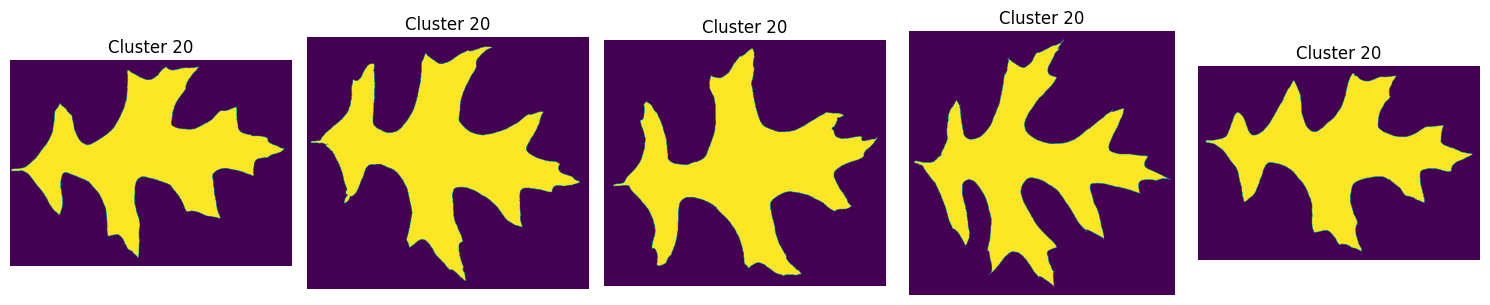


Affichage pour le Cluster 21 :


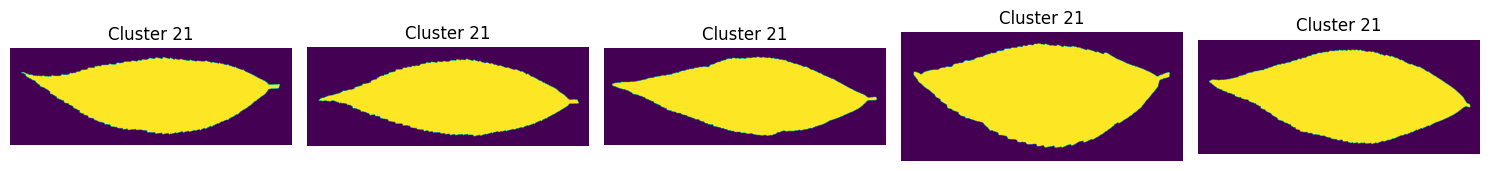


Affichage pour le Cluster 22 :


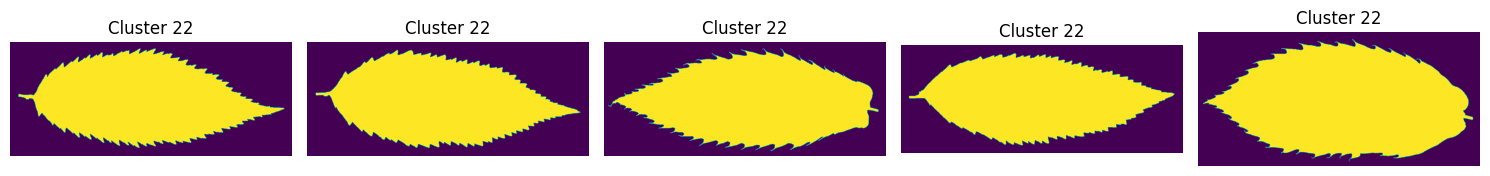


Affichage pour le Cluster 23 :


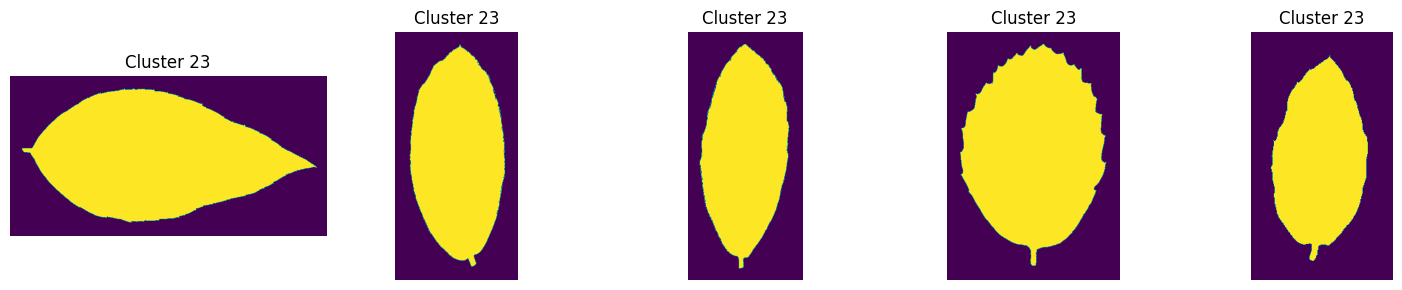


Affichage pour le Cluster 24 :


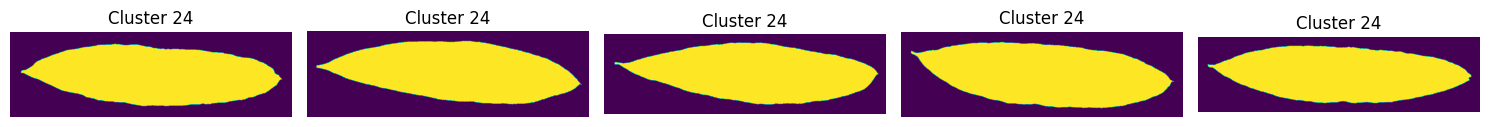


Affichage pour le Cluster 25 :


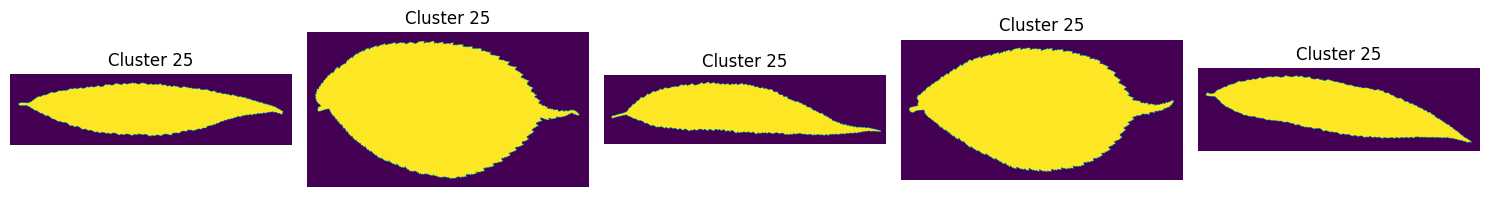


Affichage pour le Cluster 26 :


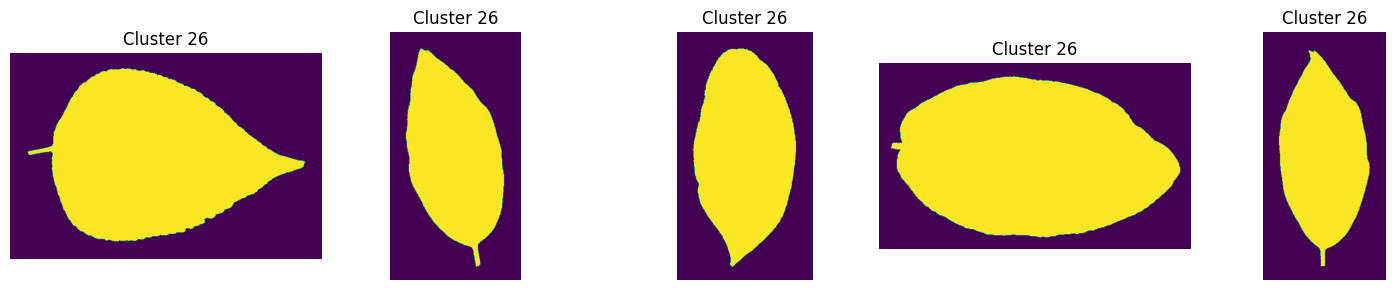


Affichage pour le Cluster 27 :


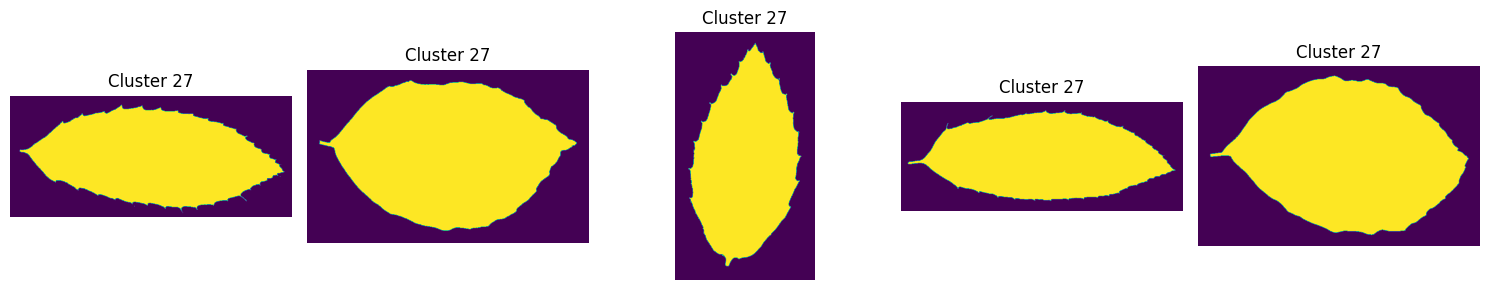


Affichage pour le Cluster 28 :


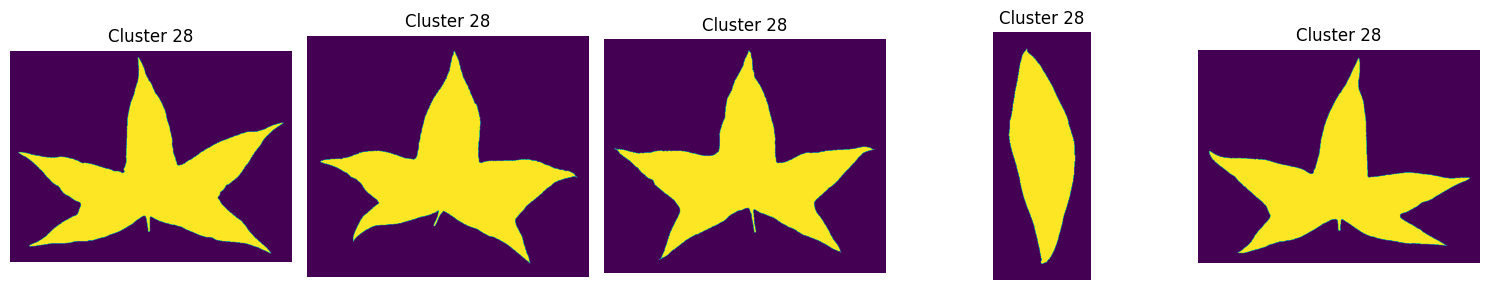


Affichage pour le Cluster 29 :


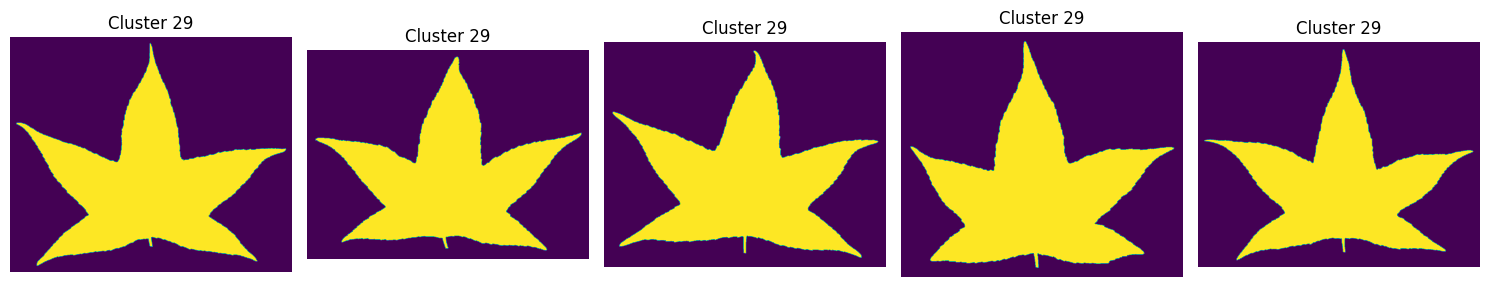


Affichage pour le Cluster 30 :


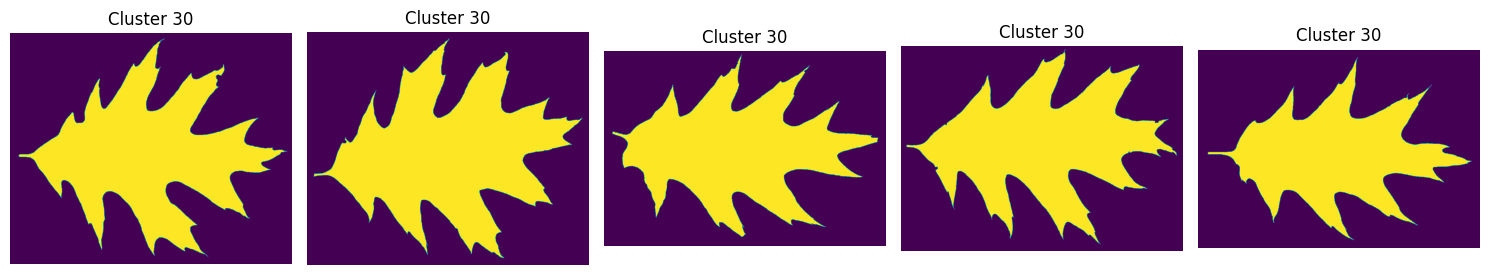


Affichage pour le Cluster 31 :


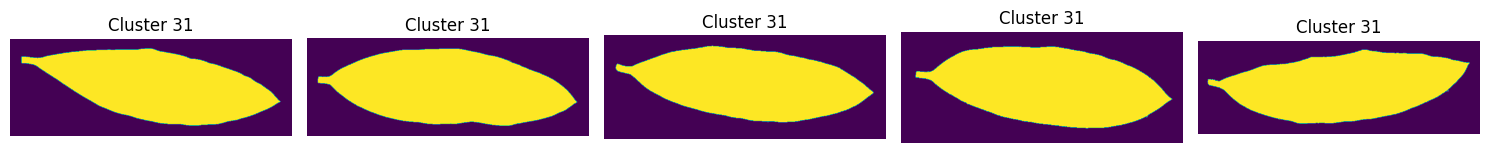


Affichage pour le Cluster 32 :


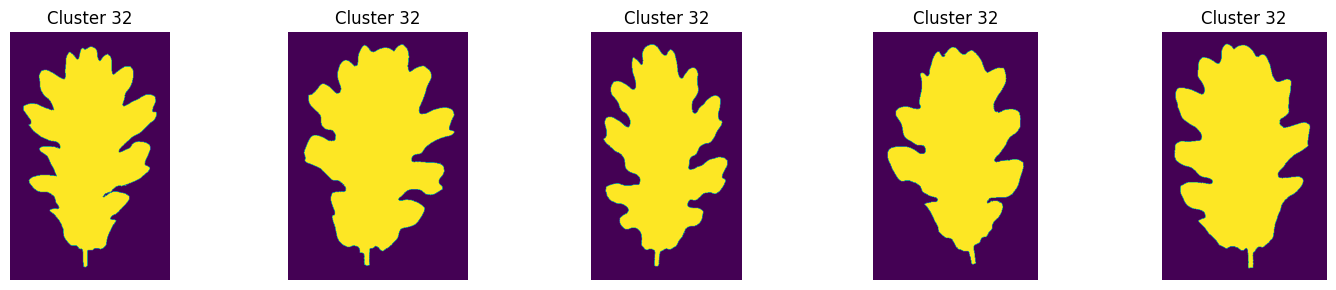


Affichage pour le Cluster 33 :


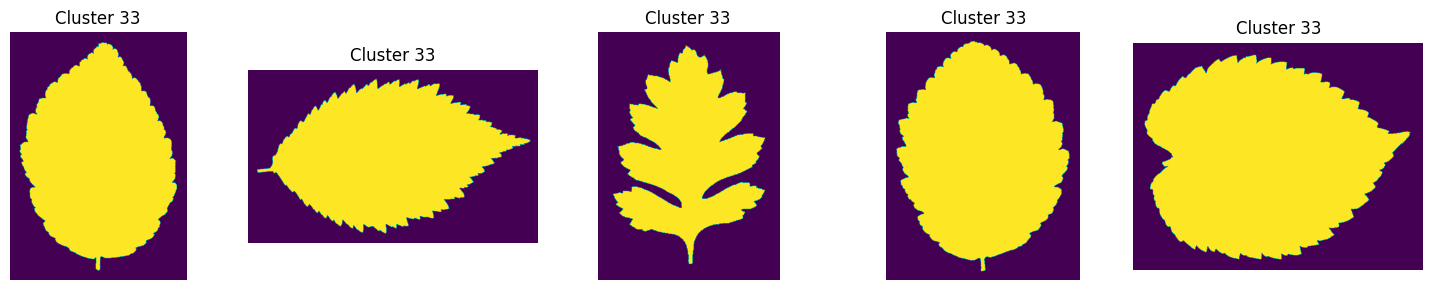


Affichage pour le Cluster 34 :


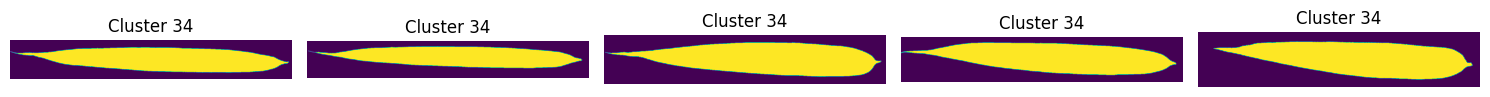


Affichage pour le Cluster 35 :


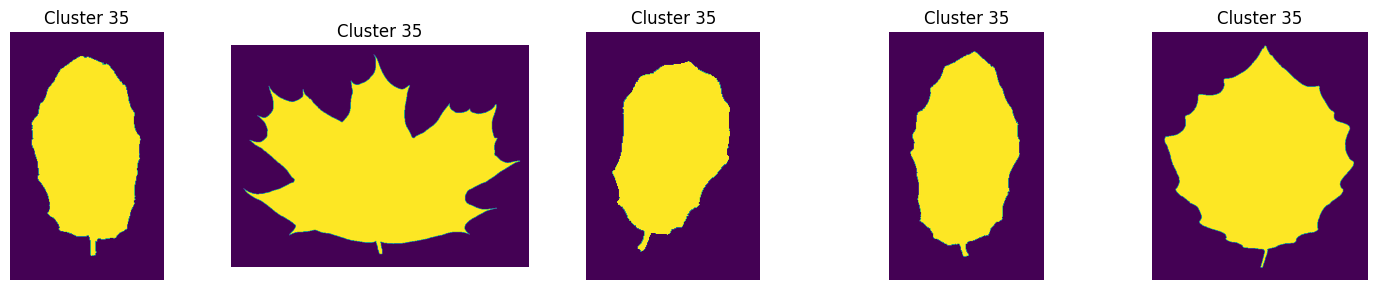

In [52]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# === Répertoire contenant les images ===
chemin_images = r'C:\Users\lenovo\Desktop\TP_AD\leafimages'

# === Convertir les identifiants en chaînes si ce sont des entiers ===
ids_feuilles = df["id"].astype(str).tolist()

# === Fonction d'affichage des images d'un cluster donné ===
def afficher_images_par_cluster(cluster_num, cluster_labels, id_list, nb_images=5):
    # Indices des images appartenant au cluster donné
    indices_cluster = [i for i, lab in enumerate(cluster_labels) if lab == cluster_num]
    
    if not indices_cluster:
        print(f"Aucune image trouvée pour le cluster {cluster_num}")
        return
    
    # Sélection d'un sous-ensemble d'images
    indices_selection = indices_cluster[:nb_images]
    
    plt.figure(figsize=(15, 3))
    for j, idx in enumerate(indices_selection):
        image_nom = id_list[idx] + ".jpg"
        chemin_image = os.path.join(chemin_images, image_nom)
        try:
            image = mpimg.imread(chemin_image)
            plt.subplot(1, nb_images, j+1)
            plt.imshow(image)
            plt.title(f"Cluster {cluster_num}")
            plt.axis('off')
        except FileNotFoundError:
            print(f"Image non trouvée : {chemin_image}")
    plt.tight_layout()
    plt.show()

# === Affichage global pour chaque cluster ===
nb_clusters = len(set(final_cluster_ids))  # nombre de clusters détectés

for k in range(nb_clusters):
    print(f"\nAffichage pour le Cluster {k} :")
    afficher_images_par_cluster(cluster_num=k, cluster_labels=final_cluster_ids, id_list=ids_feuilles, nb_images=5)


Interprétation :
Une évaluation qualitative des clusters a été réalisée en affichant quelques images par cluster. Nous avons observé que les feuilles regroupées dans un même cluster présentaient souvent des similarités visuelles (forme, bord, texture), ce qui montre que le modèle a partiellement réussi à distinguer des groupes homogènes.

Toutefois, certains clusters contenaient des feuilles hétérogènes ou visuellement similaires à celles d’autres clusters, ce qui témoigne d'une certaine confusion dans la classification.

## 4.  Application de l'ACP puis Clustering (évaluation des performances)

nous appliquons une réduction de dimension avec l'ACP (pour conserver 95 % de la variance) et réappliquons KMeans sur les données réduites. Nous comparons ensuite les performances (ARI, score de Silhouette, temps de calcul) avec le modèle précédent.


In [53]:
from sklearn.decomposition import PCA
import time
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

# Réduction de dimension par ACP pour conserver 95 % de la variance
pca_model = PCA(n_components=0.95, random_state=42)
X_reduit = pca_model.fit_transform(X_norm)
print("Nombre de composantes conservées :", X_reduit.shape[1])

# Entraînement du modèle KMeans sur les données réduites par ACP
debut = time.time()
kmeans_acp = KMeans(n_clusters=optimal_k, random_state=100, n_init=10)
cluster_ids_acp = kmeans_acp.fit_predict(X_reduit)
fin = time.time()
temps_acp = fin - debut

# Évaluation par score de silhouette sur données réduites
score_silhouette_acp = silhouette_score(X_reduit, cluster_ids_acp)

# Comparaison avec les vraies classes (seulement sur train)
# Encodage des vraies étiquettes (on utilise ces données pour évaluer l'ARI)
encodeur = LabelEncoder()
y_vrai = encodeur.fit_transform(train_data["species"]) if 'train_data' in globals() else encodeur.fit_transform(df["species"])
score_ari_acp = adjusted_rand_score(y_vrai, cluster_ids_acp)

print("\nRésultats du clustering après ACP :")
print(f"Adjusted Rand Index (Train) : {score_ari_acp:.4f}")
print(f"Score de Silhouette (Train)   : {score_silhouette_acp:.4f}")
print(f"Temps de calcul (ACP + KMeans)  : {temps_acp:.4f} secondes")


Nombre de composantes conservées : 69

Résultats du clustering après ACP :
Adjusted Rand Index (Train) : 0.3331
Score de Silhouette (Train)   : 0.1790
Temps de calcul (ACP + KMeans)  : 0.1042 secondes


Interprétation:
Après réduction de dimension par ACP (69 composantes, 95 % de la variance conservée), le clustering avec KMeans donne un ARI de 0.3331, indiquant une cohérence modérée avec les vraies classes. Le score de silhouette de 0.1790 montre que les clusters sont peu séparés, mais le temps de calcul très rapide (0.1395 s) confirme que l’ACP a réduit efficacement la complexité du problème.


- L’ACP a permis une réduction efficace de la dimension tout en préservant la qualité du clustering.

- Le compromis entre performance et temps de calcul est raisonnable.

- Toutefois, le clustering reste imparfait, ce qui peut venir de la complexité intrinsèque des données ou de la nature non linéaire des séparations entre classes, ce que KMeans ne peut pas capter.

## Conclusion générale 
Ce projet avait pour objectif de mettre en œuvre des techniques de classification non supervisée (clustering) pour l’analyse et la reconnaissance de feuilles à partir de descripteurs visuels (margin, shape, texture).

Dans un premier temps, nous avons exploré les données et appliqué différentes méthodes de clustering (notamment K-means) en étudiant plusieurs critères pour évaluer la qualité des clusters, comme l’indice de silhouette, l’Elbow method, et l’ARI (Adjusted Rand Index) pour juger de la cohérence avec les classes réelles. L’analyse qualitative (visualisation d’images par cluster) a également permis d’avoir un aperçu visuel de la pertinence du regroupement.

Nous avons ensuite testé une réduction de dimension par ACP (PCA), conservant 95 % de la variance, ce qui a permis d’alléger les données tout en maintenant une bonne partie de l’information. Cependant, la réduction de dimension a légèrement dégradé les performances du clustering en termes d’ARI et de séparation des clusters, bien que le temps de calcul ait été significativement réduit.

